<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/sklearn_exercise/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

test = np.load('/content/drive/MyDrive/Colab_Notebooks/quickdraw/bird.npy')
print(test.shape)

(133572, 784)


In [ ]:
idx = np.arange(test.shape[0])
rnd_idx = np.random.choice(idx, 10000, replace=False)
t = test[rnd_idx]
t[0:10000].shape
del idx

In [2]:
def make_ndarray(target_list, each_size) :
    # 784 means bitmap size
    data = np.empty((len(target_list)*each_size, 784))
    target = np.empty((len(target_list)*each_size))
    for label, filename in enumerate(target_list) :
        npy = np.load('/content/drive/MyDrive/Colab_Notebooks/quickdraw/{}.npy'.format(filename))
        tmp = np.arange(npy.shape[0])
        idx = np.random.choice(tmp, each_size, replace=False)
        data[label*each_size:(label+1)*each_size] = npy[idx]
        target[label*each_size:(label+1)*each_size] = label
        print('{} is Complete'.format(filename))
    s_idx = np.arange(target.shape[0])
    np.random.shuffle(s_idx)
    data = data[s_idx]
    target = target[s_idx]
    print('result shape : {0} & {1}'.format(data.shape, target.shape))
    return data, target

target_list = ['ant', 'bicycle', 'bird', 'butterfly', 'camel', 'clock', 'cow', 'diamond']
data, target = make_ndarray(target_list=target_list, each_size=10000)

ant is Complete
bicycle is Complete
bird is Complete
butterfly is Complete
camel is Complete
clock is Complete
cow is Complete
diamond is Complete
result shape : (80000, 784) & (80000,)


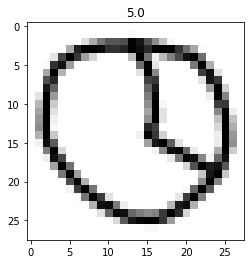

In [3]:
def show_image(index) :
    plt.imshow(data[index].reshape(28, 28), cmap='binary')
    plt.title(target[index])
show_image(21)

In [4]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size = 0.2, random_state=42)

In [5]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier # Neural network

In [6]:
# classifier generation
dt_clf = tree.DecisionTreeClassifier(random_state=42)
random_clf = RandomForestClassifier(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
ext_clf = ExtraTreesClassifier(random_state=42)

In [ ]:
# Training  classifiers
dt_clf.fit(X_train, y_train)
random_clf.fit(X_train, y_train)
mlp_clf.fit(X_train, y_train)
ext_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [ ]:
print(dt_clf.score(X_test, y_test))
print(random_clf.score(X_test, y_test))
print(mlp_clf.score(X_test, y_test))
print(ext_clf.score(X_test, y_test))

0.5818125
0.7869375
0.7305
0.7953125


In [ ]:
from sklearn.ensemble import VotingClassifier
named_estimators = [('rf', random_clf),
                    ('mlp', mlp_clf),
                    ('ext', ext_clf),
                    ('dt', dt_clf)]

In [ ]:
voting_clf = VotingClassifier(estimators=named_estimators, voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
voting_score = voting_clf.score(X_test, y_test)
voting_score

0.7950625

In [ ]:
voting_clf.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=200,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=42, shuffle=True, solver='adam',
              

In [ ]:
voting_clf.voting = 'soft'
new_voting_score = voting_clf.score(X_test, y_test)
print('old score : {0}, new score : {1}'.format(voting_score, new_voting_score))

old score : 0.7950625, new score : 0.7415


In this case, hard voting method shows better performance

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(bootstrap = True, oob_score = True, random_state = 42)
bagging_clf.fit(X_train, y_train)
bagging_score = bagging_clf.score(X_test, y_test)
bagging_score_oob = bagging_clf.oob_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [ ]:
print('bagging score :', bagging_score, 'oob_score :', bagging_score_oob)

bagging score : 0.7045 oob_score : 0.61534375


In [ ]:
params = {'n_estimators' : 100, 'max_samples' : 0.3, 'n_jobs' : -1}
bagging_clf.set_params(**params)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.3, n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                  warm_start=False)

In [ ]:
bagging_clf.fit(X_train, y_train)
print('bagging score :', bagging_clf.score(X_test, y_test), 'oob_score :', bagging_clf.oob_score_)

bagging score : 0.7615625 oob_score : 0.758515625


In [ ]:
rnd_clf = RandomForestClassifier(oob_score = True, random_state=42)
rnd_clf.fit(X_train, y_train)
print('method score :', rnd_clf.score(X_test, y_test), 'oob_score :', rnd_clf.oob_score_)

method score : 0.7869375 oob_score : 0.767296875


In [ ]:
X_sub , y_sub = make_ndarray(target_list, each_size=1000)

ant is Complete
bicycle is Complete
bird is Complete
butterfly is Complete
camel is Complete
clock is Complete
cow is Complete
diamond is Complete
result shape : (8000, 784) & (8000,)


In [ ]:
Xs_train, Xs_test, ys_train, ys_test = model_selection.train_test_split(X_sub, y_sub, test_size = 0.2, random_state =42)

In [ ]:
rnd_clf.fit(Xs_train, ys_train)
print('method score :', rnd_clf.score(Xs_test, ys_test), 'oob_score :', rnd_clf.oob_score_)

method score : 0.73 oob_score : 0.69234375


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {'n_estimators' : [10, 50, 100, 150, 200], 'max_depth' : [None, 1, 3, 5], 'criterion' : ['gini', 'entropy']}
grid_search = GridSearchCV(rnd_clf, param_grid= grid_param, n_jobs = -1, verbose = 2, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 39.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=True, random_state=42,
                                   

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
scores = pd.DataFrame(grid_search.cv_results_)
scores[['params','mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}",0.685500,10,0.684541,0.686589,0.685370
1,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}",0.765047,8,0.762211,0.764871,0.768059
2,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}",0.779938,6,0.778991,0.779918,0.780903
3,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}",0.786125,3,0.785741,0.785778,0.786856
4,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}",0.788141,2,0.788413,0.787747,0.788262
5,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}",0.367172,38,0.368567,0.354568,0.378381
6,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}",0.370953,36,0.366082,0.359396,0.387381
7,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}",0.366469,39,0.359708,0.363568,0.376131
8,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 150}",0.369828,37,0.358254,0.367881,0.383350
9,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 200}",0.342750,40,0.336458,0.339005,0.352787


In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


In [ ]:
rnd_clf.score(X_test, y_test)

0.7258125

(-0.5, 27.5, 27.5, -0.5)

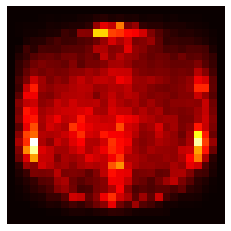

In [ ]:
import matplotlib as mpl
feature_importance = rnd_clf.feature_importances_
image = feature_importance.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
plt.axis("off")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_params = {'base_estimator' : [dt_clf, random_clf, mlp_clf, ext_clf], 'n_estimators' : [50, 100, 150], 'learning_rate' : [0.2, 0.4, 0.6, 0.8, 1.0], 'algorithm' : ['SAMME', 'SAMME.R']}
grid_search = GridSearchCV(ada_clf, param_grid=ada_params, verbose=2, cv = 3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), learning_rate=0.2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), learning_rate=0.2, n_estimators=50, total=  18.9s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), learning_rate=0.2, n_es

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), learning_rate=0.2, n_estimators=50, total=  18.8s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), learning_rate=0.2, n_es

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tru

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=Tr

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME, base_estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False), learning_rate=0.2, n_estimators=50, total=  33.2s
[CV] algorithm=SAMME, base_estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.2, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.4, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.6, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=0.8, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), learning_rate=1.0, n_estimators=150, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: MLPClassifier doesn't support sample_weight.

  FitFailedWarning)


[CV]  algorithm=SAMME.R, base_estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False), learning_rate=0.2, n_estimators=50, total=  33.3s
[CV] algorithm=SAMME.R, base_estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 148.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,...
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_s

In [ ]:
ada_score = pd.DataFrame(grid_search.cv_results_)
ada_score[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]

params  ...  split2_test_score
0    {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), 'learning_rate': 0.2, 'n_estimators': 50}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weigh

In [ ]:
best_ada_clf = AdaBoostClassifier(ext_clf, n_estimators=50, learning_rate=0.2, algorithm='SAMME', random_state=42)
best_ada_clf.fit(X_train, y_train)
best_ada_clf.score(X_test, y_test)

0.7941875

In [9]:
estimators = [dt_clf, random_clf, mlp_clf, ext_clf]
X_first, X_second, y_first, y_second = model_selection.train_test_split(X_train, y_train, test_size = 0.5, random_state = 42)
X_first.shape
# make X_first for exercise each estimator, X_second for get new data set exercised in blender

(32000, 784)

In [12]:
for order, clf in enumerate(estimators) :
    clf.fit(X_first, y_first)
    print('{0}/{1} fitting completed.'.format(order+1, len(estimators)))

1/4 fitting completed.
2/4 fitting completed.
3/4 fitting completed.
4/4 fitting completed.


In [14]:
layer_result = np.empty((len(X_second), len(estimators)))
for index, clf in enumerate(estimators) :
    layer_result[:, index] = clf.predict(X_second)
    print('{0}/{1} prediction completed.'.format(index+1, len(estimators)))

1/4 prediction completed.
2/4 prediction completed.
3/4 prediction completed.
4/4 prediction completed.


In [15]:
print(layer_result[:5, :])

[[6. 6. 6. 4.]
 [4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [5. 5. 5. 5.]
 [1. 2. 2. 2.]]


In [16]:
rnd_blender = RandomForestClassifier(random_state=42)
rnd_blender.fit(layer_result, y_second)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
output = np.empty((len(X_test), len(estimators)))
for index, clf in enumerate(estimators) :
    output[:, index] = clf.predict(X_test)
    print('{0}/{1} prediction completed.'.format(index+1, len(estimators)))

1/4 prediction completed.
2/4 prediction completed.
3/4 prediction completed.
4/4 prediction completed.


In [18]:
print(output.shape, X_test.shape)

(16000, 4) (16000, 784)


In [20]:
rnd_blender.score(output, y_test)

0.776625

In [21]:
from sklearn.model_selection import GridSearchCV
grid_param = {'n_estimators' : [10, 50, 100, 150, 200], 'max_depth' : [None, 1, 3, 5], 'criterion' : ['gini', 'entropy']}
grid_search = GridSearchCV(rnd_blender, verbose = 2, cv = 5, param_grid = grid_param)
grid_search.fit(output, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] criterion=gini, max_depth=None, n_estimators=10 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=10 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=10 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. criterion=gini, max_depth=None, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=10 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=10 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.4s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [24]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
blender_score = pd.DataFrame(grid_search.cv_results_)
blender_score[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}",0.764125,19,0.770000,0.766563,0.761875
1,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}",0.766062,17,0.773438,0.764062,0.764062
2,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}",0.766813,15,0.772188,0.766250,0.765938
3,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}",0.767688,12,0.771563,0.767500,0.768437
4,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}",0.767875,11,0.773125,0.768437,0.768750
5,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 10}",0.237750,40,0.238125,0.235313,0.236563
6,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}",0.238500,36,0.238125,0.237500,0.238750
7,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}",0.238500,36,0.238125,0.237500,0.238750
8,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 150}",0.238500,36,0.238125,0.237500,0.238750
9,"{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 200}",0.238500,36,0.238125,0.237500,0.238750


In [30]:
# execute GridSearchCV in narrow range in best params
grid_param = {'n_estimators' : list(range(20, 80, 5)), 'max_depth' : [3, 4, 5, 6, 7, 8, 9], 'criterion' : ['gini', 'entropy']}
grid_search = GridSearchCV(rnd_blender, verbose = 2, cv = 5, param_grid = grid_param)
grid_search.fit(output, y_test)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=3, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=20 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=25 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=25, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=25 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=25, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=25 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=25, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=25 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=25, total=   0.1s
[CV] criterion=gini, max_depth=3, n_estimators=25 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [35]:
blender_score = pd.DataFrame(grid_search.cv_results_)
blender_score = blender_score[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score','split1_test_score', 'split2_test_score']]
blender_score.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
127,"{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 55}",0.785375,1,0.793750,0.787813,0.785000
143,"{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 75}",0.784875,2,0.793125,0.785000,0.785000
126,"{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}",0.784875,3,0.792500,0.785312,0.785937
129,"{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 65}",0.784812,4,0.794063,0.787500,0.782813
114,"{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}",0.784750,5,0.791250,0.788438,0.783125
...,...,...,...,...,...,...
8,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 60}",0.555438,164,0.552188,0.557500,0.556875
4,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 40}",0.554937,165,0.551250,0.553750,0.562187
0,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}",0.554438,166,0.551875,0.556250,0.554375
2,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 30}",0.553813,167,0.554688,0.549063,0.558125


In [39]:
print('estimator :', grid_search.estimator)
print("best parameters :", grid_search.best_params_)
print("best score for test set :", grid_search.best_score_)

estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
best parameters : {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 55}
best score for test set : 0.785375


In [40]:
# 3 layer stacking algorithm
X_first, X_second, y_first, y_second = model_selection.train_test_split(X_train, y_train, test_size = 1/3, random_state = 42)
X_first.shape

(42666, 784)

In [41]:
# split data set in three part
X_first, X_third, y_first, y_third = model_selection.train_test_split(X_first, y_first, test_size = 0.5, random_state = 42)
X_first.shape

(21333, 784)

In [84]:
dt_l1 = tree.DecisionTreeClassifier(random_state=42)
random_l1 = RandomForestClassifier(random_state=42)
mlp_l1 = MLPClassifier(max_iter = 1000, random_state=42)
ext_l1 = ExtraTreesClassifier(random_state=42)

dt_l2 = tree.DecisionTreeClassifier(random_state=42)
random_l2 = RandomForestClassifier(random_state=42)
mlp_l2 = MLPClassifier(max_iter = 1000, random_state=42)
ext_l2 = ExtraTreesClassifier(random_state=42)

In [85]:
estimators_l1 = [dt_l1, random_l1, mlp_l1, ext_l1]
estimators_l2 = [dt_l2, random_l2, mlp_l2, ext_l2]

In [86]:
for index, clf in enumerate(estimators_l1) :
    clf.fit(X_first, y_first)
    print('{0}/{1} fitting completed'.format(index+1, len(estimators_l1)))

1/4 fitting completed
2/4 fitting completed
3/4 fitting completed
4/4 fitting completed


In [87]:
output_l1 = np.empty((len(X_second), len(estimators_l1)))
for index, clf in enumerate(estimators_l1) :
    output_l1[:, index] = clf.predict(X_second)
    print('{0}/{1} prediction completed'.format(index+1, len(estimators_l1)))

1/4 prediction completed
2/4 prediction completed
3/4 prediction completed
4/4 prediction completed


In [88]:
output_l1.shape

(21334, 4)

In [91]:
result = [output_l1[:10], y_second[:10]]
result

[array([[6., 6., 6., 6.],
        [4., 4., 4., 4.],
        [3., 3., 3., 3.],
        [5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [0., 2., 2., 2.],
        [2., 4., 6., 0.],
        [5., 4., 6., 4.],
        [5., 0., 4., 3.],
        [6., 6., 0., 6.]]), array([6., 4., 3., 5., 2., 2., 1., 4., 4., 6.])]

In [92]:
for index, clf in enumerate(estimators_l2) :
    clf.fit(output_l1, y_second)
    print('{0}/{1} fitting completed'.format(index+1, len(estimators_l2)))

1/4 fitting completed
2/4 fitting completed
3/4 fitting completed
4/4 fitting completed


In [96]:
input_l2 = np.empty((len(X_third), len(estimators_l1)))
for index, clf in enumerate(estimators_l1) :
    input_l2[:, index] = clf.predict(X_third)
    print('{0}/{1} prediction completed'.format(index+1, len(estimators_l1)))

1/4 prediction completed
2/4 prediction completed
3/4 prediction completed
4/4 prediction completed


In [97]:
input_l2[:10]

array([[0., 0., 0., 0.],
       [6., 4., 4., 4.],
       [5., 5., 5., 5.],
       [0., 3., 0., 3.],
       [7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

In [98]:
input_l2.shape

(21333, 4)

In [99]:
output_l2 = np.empty((len(X_third), len(estimators_l2)))
for index, clf in enumerate(estimators_l2) :
    output_l2[:, index] = clf.predict(input_l2)
    print('{0}/{1} prediction completed'.format(index+1, len(estimators_l2)))

1/4 prediction completed
2/4 prediction completed
3/4 prediction completed
4/4 prediction completed


In [100]:
output_l2[:10]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [4., 4., 4., 4.],
       [4., 4., 4., 4.]])

In [101]:
y_third[:10]

array([0., 4., 5., 3., 7., 6., 0., 1., 4., 4.])

In [102]:
two_layer_blender = RandomForestClassifier(random_state = 42)
two_layer_blender.fit(output_l2, y_third)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [103]:
test_l1 = np.empty((len(X_test), len(estimators_l1)))
for index, clf in enumerate(estimators_l1) :
    test_l1[:, index] = clf.predict(X_test)
print(test_l1.shape)

(16000, 4)


In [104]:
test_l2 = np.empty(test_l1.shape)
for index, clf in enumerate(estimators_l2) :
    test_l2[:, index] = clf.predict(test_l1)
print(test_l2.shape)

(16000, 4)


In [105]:
two_layer_score = two_layer_blender.score(test_l2, y_test)
two_layer_score

0.7751875

# 새 섹션